<a href="https://colab.research.google.com/github/edilmita/edilmita/blob/main/capstoneActual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





## Edilma G. Fields
## Master of Science in Data Science, Grand Canyon University
## UNI – 580: Designing and Creating Data Products
## October 12, 2022



## Generate an application to develop and optimize an approach to allow the USA to project/predict having 90% of the country's energy generated predominantly by renewable energy systems.



##Developing the infrastructure necessary that intensify the implementation of renewable energies, has become an addition to the Energy problem, not a solution since all implementations have been limited to infrastructure and not to the implementation of the development of efficient transmitters, collectors, batteries, or the optimization of mechanisms to achieve the effectiveness of the current system of electrical dependency with other factors like:
##According to new research… (Local Renewable Energy Benefits and Resources, 2022).	
###1)	Change the infrastructure of the power companies in the United States!
###2)	Efficiency and Reliability of the new power system
###3)	Space and Environment Protection 
###4)	Evaluate the accessibility of regional renewable resources
###5)	Engage investors, especially regarding siting.


##This application wishes to provide the necessary analysis tools for updating the infrastructures of current energy generation systems, intelligently combining the different methods of producing renewable energy. To guarantee the efficiency and dependability of the new systems, providing the specific figures that must be met, for the implementation of the objective, the information must be tracked until met his projection by 2050.

##Intensify each method of renewable energy generation based on the conditions and potential development of these methods according to the location and the advantages offered by each state of the country, based on the figures provided by each state in the implementation of renewable energies to date, it is intended to make a projection of the number of resources needed to meet the 2050 projection.

##The final objective of this evaluation work is intended to offer an outcoming objective and detailed analysis to motivate investors who wish to enter the renewable energy business and increase the probability of meeting the main projection for 2050.







Data set

##Import necesary lybraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time
from collections import Counter
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import *   
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  

import os
import sys
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Pretty display for notebooks
%matplotlib inline

###Read the CSV file and display the first 5 Rows

In [89]:
allmydata = pd.read_csv('/content/total2022.csv')
allmydata.head(5)

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION\n(Megawatthours)
0,2022,1,AK,Total Electric Power Industry,Total,584412
1,2022,1,AK,Total Electric Power Industry,Coal,75088
2,2022,1,AK,Total Electric Power Industry,Hydroelectric Conventional,198901
3,2022,1,AK,Total Electric Power Industry,Natural Gas,214245
4,2022,1,AK,Total Electric Power Industry,Other,-104


###Checking some information to proof the data import.

In [90]:
allmydata.shape

(12700, 6)

###The user selected the state for the project. 

In [91]:
mydata = allmydata[allmydata['STATE'] == 'CA']
 
print(mydata)

       YEAR  MONTH STATE                         TYPE OF PRODUCER  \
147    2022      1    CA            Total Electric Power Industry   
148    2022      1    CA            Total Electric Power Industry   
149    2022      1    CA            Total Electric Power Industry   
150    2022      1    CA            Total Electric Power Industry   
151    2022      1    CA            Total Electric Power Industry   
...     ...    ...   ...                                      ...   
10791  2022      6    CA  Electric Generators, Electric Utilities   
10792  2022      6    CA  Electric Generators, Electric Utilities   
10793  2022      6    CA  Electric Generators, Electric Utilities   
10794  2022      6    CA  Electric Generators, Electric Utilities   
10795  2022      6    CA  Electric Generators, Electric Utilities   

                        ENERGY SOURCE  GENERATION\n(Megawatthours)  
147                             Total                     14641676  
148                              

###Data Confirmation information

In [92]:
mydata.shape


(378, 6)

###Check the data information we have integer 3 columns and 3 String columns

In [93]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 147 to 10795
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   YEAR                        378 non-null    int64 
 1   MONTH                       378 non-null    int64 
 2   STATE                       378 non-null    object
 3   TYPE OF PRODUCER            378 non-null    object
 4   ENERGY SOURCE               378 non-null    object
 5   GENERATION
(Megawatthours)  378 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 20.7+ KB
None


Rename the columns names

In [94]:
mydata.columns = ['YEAR','MONTH','STATE','PRODUCER','ENERGY','GENERATION']
print(mydata.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 147 to 10795
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        378 non-null    int64 
 1   MONTH       378 non-null    int64 
 2   STATE       378 non-null    object
 3   PRODUCER    378 non-null    object
 4   ENERGY      378 non-null    object
 5   GENERATION  378 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 20.7+ KB
None


# Data Clean

Lost data can happen once no data is given for some items or for an entire component. Missing data is a extremely huge problem in a real-life situations.

In order to find missing values we used isna() function and sum to count the NaN values

In [95]:
mydata.isna().sum() 

YEAR          0
MONTH         0
STATE         0
PRODUCER      0
ENERGY        0
GENERATION    0
dtype: int64

## Checking for duplicate cells

In [96]:
mydata.duplicated().sum()

0

Because there is no null values in any of the columns, there is no need to remove or replace the empty cells.

likewise there is no

data in wrong format
duplicate data.

Finding some stadistitics.

In [97]:
mydata['YEAR'].value_counts()

2022    378
Name: YEAR, dtype: int64

This Column "YEAR" only have the current Year

In [98]:
mydata['STATE'].value_counts()

CA    378
Name: STATE, dtype: int64

The STATE column only have the state select for the project

In [99]:
mydata['PRODUCER'].value_counts()

Total Electric Power Industry                       84
Electric Generators, Electric Utilities             72
Combined Heat and Power, Industrial Power           60
Electric Generators, Independent Power Producers    60
Combined Heat and Power, Commercial Power           54
Combined Heat and Power, Electric Power             48
Name: PRODUCER, dtype: int64

This funtion value_counts() Return a list that containing how many of unique values there are in the column PRODUCER. The resulting object will be in descending order so that the first element is the most frequently-occurring ...

For the exercise we need to convert string values in a pandas dataframe to a unique integer so that the algorithms can perform better. So we assign unique numeric value to a string value in Pandas DataFrame.

In [100]:
mydata = mydata.replace('Electric Generators, Electric Utilities',1)
mydata = mydata.replace('Combined Heat and Power, Industrial Power', 2)
mydata = mydata.replace('Electric Generators, Independent Power Producers',3)
mydata = mydata.replace('Combined Heat and Power, Commercial Power',4)
mydata = mydata.replace('Combined Heat and Power, Electric Power',5)
mydata = mydata.replace('Total Electric Power Industry',0)

mydata['PRODUCER'].value_counts()

0    84
1    72
2    60
3    60
4    54
5    48
Name: PRODUCER, dtype: int64

In [101]:
print(mydata)

       YEAR  MONTH STATE  PRODUCER                          ENERGY  GENERATION
147    2022      1    CA         0                           Total    14641676
148    2022      1    CA         0                            Coal       20157
149    2022      1    CA         0                      Geothermal     1048443
150    2022      1    CA         0                  Pumped Storage      -64301
151    2022      1    CA         0      Hydroelectric Conventional      999589
...     ...    ...   ...       ...                             ...         ...
10791  2022      6    CA         1                           Other       -3571
10792  2022      6    CA         1                       Petroleum        2779
10793  2022      6    CA         1  Solar Thermal and Photovoltaic       51604
10794  2022      6    CA         1                   Other Biomass         425
10795  2022      6    CA         1                            Wind       94338

[378 rows x 6 columns]


In [102]:
mydata['PRODUCER'].value_counts()

0    84
1    72
2    60
3    60
4    54
5    48
Name: PRODUCER, dtype: int64

### Get indexes the column PRODUCER has value 0
###Delete these row indexes from dataFrame

In [103]:
indexNames = mydata[mydata['PRODUCER'] == 0].index
mydata.drop(indexNames , inplace=True)
mydata['PRODUCER'].value_counts()


1    72
2    60
3    60
4    54
5    48
Name: PRODUCER, dtype: int64

This funtion value_counts() Return a list that containing how many of unique values there are in the column ENERGY. The resulting object will be in descending order so that the first element is the most frequently-occurring ...

In [104]:
mydata['ENERGY'].value_counts()

Total                             30
Natural Gas                       30
Other                             30
Petroleum                         30
Solar Thermal and Photovoltaic    30
Other Biomass                     30
Wind                              24
Wood and Wood Derived Fuels       18
Hydroelectric Conventional        18
Coal                              12
Other Gases                       12
Pumped Storage                    12
Geothermal                        12
Nuclear                            6
Name: ENERGY, dtype: int64

### Replace string with a numerical value, so that the algorithms can perform better.
### Replace all values from the Energy column that equal a specific variable 

In [105]:
mydata = mydata.replace('Natural Gas',1)
mydata = mydata.replace('Petroleum', 2)
mydata = mydata.replace('Coal',3)
mydata = mydata.replace('Other Biomass',4)
mydata = mydata.replace('Hydroelectric Conventional',5)
mydata = mydata.replace('Wood and Wood Derived Fuels',6)
mydata = mydata.replace('Other', 7)
mydata = mydata.replace('Wind',8)
mydata = mydata.replace('Other Gases', 9)
mydata = mydata.replace('Nuclear', 10)
mydata = mydata.replace('Solar Thermal and Photovoltaic', 11)
mydata = mydata.replace('Pumped Storage', 12)
mydata = mydata.replace('Geothermal', 13)
mydata = mydata.replace('Total',0)

mydata['ENERGY'].value_counts()


0     30
1     30
7     30
2     30
11    30
4     30
8     24
6     18
5     18
3     12
9     12
12    12
13    12
10     6
Name: ENERGY, dtype: int64

###Get indexes the column ENERGY has value 0
###Delete these row indexes from dataFrame

In [106]:
indexNames = mydata[mydata['ENERGY'] == 0].index
mydata.drop(indexNames , inplace=True)
mydata['ENERGY'].value_counts()

1     30
7     30
2     30
11    30
4     30
8     24
6     18
5     18
3     12
9     12
12    12
13    12
10     6
Name: ENERGY, dtype: int64

### Remove irrelevants columns, in this specific case the column YEAR have only the year 2022, and the state only have the State choose at the begining of the exercise.

Drop a row or observation by condition in this case "total" - 0

In [107]:
mydata.pop('YEAR')
mydata.pop('STATE')

162      CA
163      CA
164      CA
165      CA
166      CA
         ..
10791    CA
10792    CA
10793    CA
10794    CA
10795    CA
Name: STATE, Length: 264, dtype: object

###Print the data information after remove the columns

In [108]:
print(mydata)

       MONTH  PRODUCER  ENERGY  GENERATION
162        1         2       3       20157
163        1         2       1      794062
164        1         2       9      114543
165        1         2       7       46489
166        1         2       2         405
...      ...       ...     ...         ...
10791      6         1       7       -3571
10792      6         1       2        2779
10793      6         1      11       51604
10794      6         1       4         425
10795      6         1       8       94338

[264 rows x 4 columns]


the funtion .Info print the information of the DatFrame The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [109]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 162 to 10795
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MONTH       264 non-null    int64
 1   PRODUCER    264 non-null    int64
 2   ENERGY      264 non-null    int64
 3   GENERATION  264 non-null    int64
dtypes: int64(4)
memory usage: 10.3 KB
None


Now we have all the columns with integer values to optimize the algorithm. 

#Statisical Description

With the describe funtion the exercise summarize the central tendency, dispersion and shape of a dataset’s distribution.

In [110]:
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,264.0,3.500000,1.711069,1.0,2.00,3.5,5.00,6.0
PRODUCER,264.0,2.795455,1.410114,1.0,1.75,3.0,4.00,5.0
ENERGY,264.0,6.227273,3.680368,1.0,3.00,6.0,9.00,13.0
GENERATION,264.0,349627.996212,742858.999895,-107933.0,387.25,19606.0,123017.25,4314130.0


###This describe how many rows are in the dataset(Count) in this case 264 only for California
###Mean or Average for column and the Generation average is: 349,628
###std or Standar Deviation for the generation is 742,859 

(Standard Deviation Formula and Uses Vs. Variance, 2022) A large standard deviation indicates that there is a lot of variance in the observed data around the mean. This indicates that the data observed is very spread out. 

###the diference between the minimun value for Generation is -107,933 and the max value is 4'314,130, this confirm that the data is very Spread out.

###25%, 50% and 75% percentiles the numbers are very spread out.
###max maximun value 

Function to calculate IOR for each numerical attribute and show skewness

In [111]:
def detection_outlier(dfcolumn):
#Calculate Q1, Q3 and IQR
 Q1 = dfcolumn.quantile(0.25)
 Q3 = dfcolumn.quantile(0.75)
 IQR = Q3-Q1 #Interquartile range
#In general, constant should be 1.
 lower  = Q1-1*IQR
 higher = Q3+1*IQR
#Find number of outliers for specific column
 print('Before data preprocessing:')
 print('Skewness:',dfcolumn.skew())
 print(dfcolumn.describe())
 dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()
 print('After replacing outliers by mean:')
 print('Skewness:',dfcolumn.skew())
 print('Median:',dfcolumn.median())
 print('IQR value:',IQR)
 print('Lower,Higher:',lower,',',higher)
 return 

Relations between the numerical columns

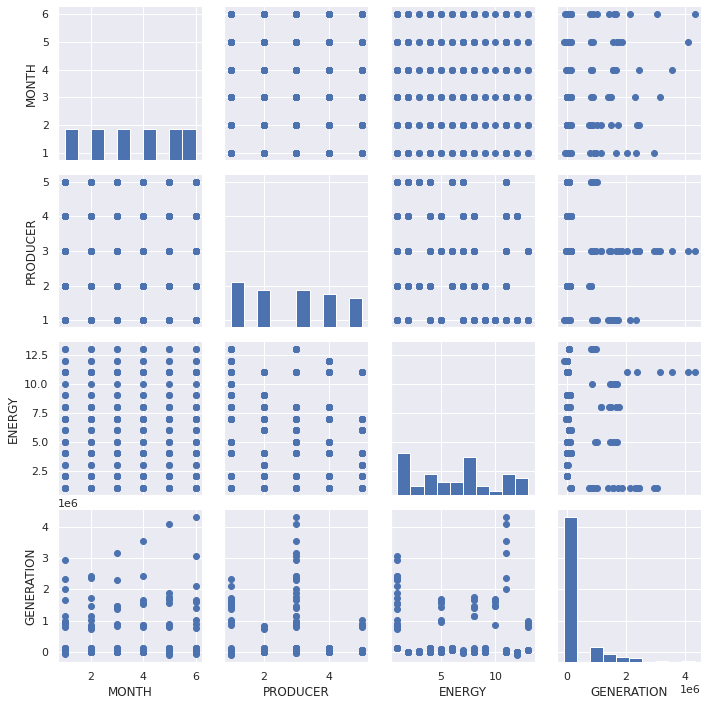

In [112]:
g = sb.PairGrid(data = mydata)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf6944a990>,
      dtype=object)

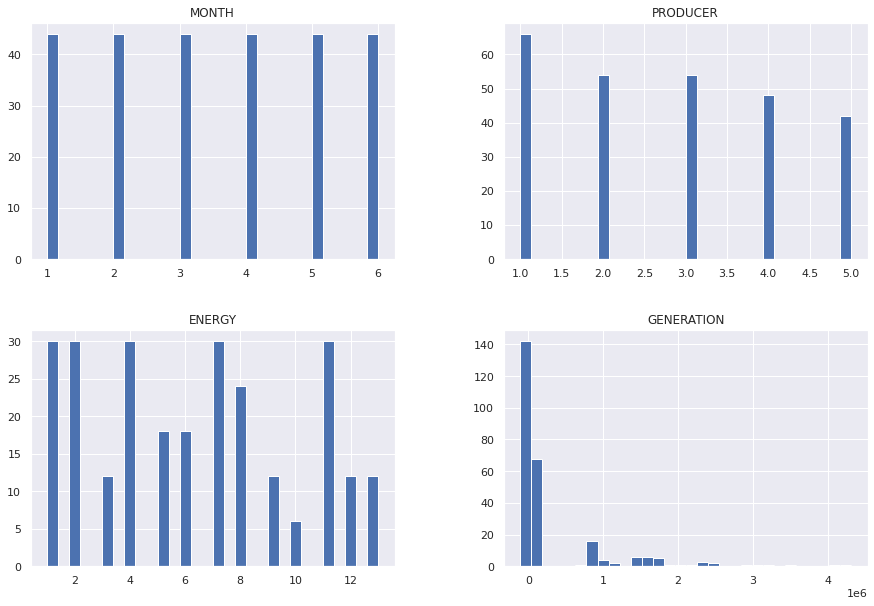

In [113]:
mydata.hist(bins=30, figsize=(15, 10))

##Features correlation matrix

##Finding Correlation

In [114]:
mydata.corr()

,MONTH,PRODUCER,ENERGY,GENERATION
MONTH,1.000000e+00,-4.716858e-16,-2.107552e-16,0.036584
PRODUCER,-4.716858e-16,1.000000e+00,-1.800331e-01,-0.115244
ENERGY,-2.107552e-16,-1.800331e-01,1.000000e+00,-0.030155
GENERATION,3.658354e-02,-1.152444e-01,-3.015534e-02,1.000000


###To have an idea of correlation between our variables we can plot the correlation matrix.

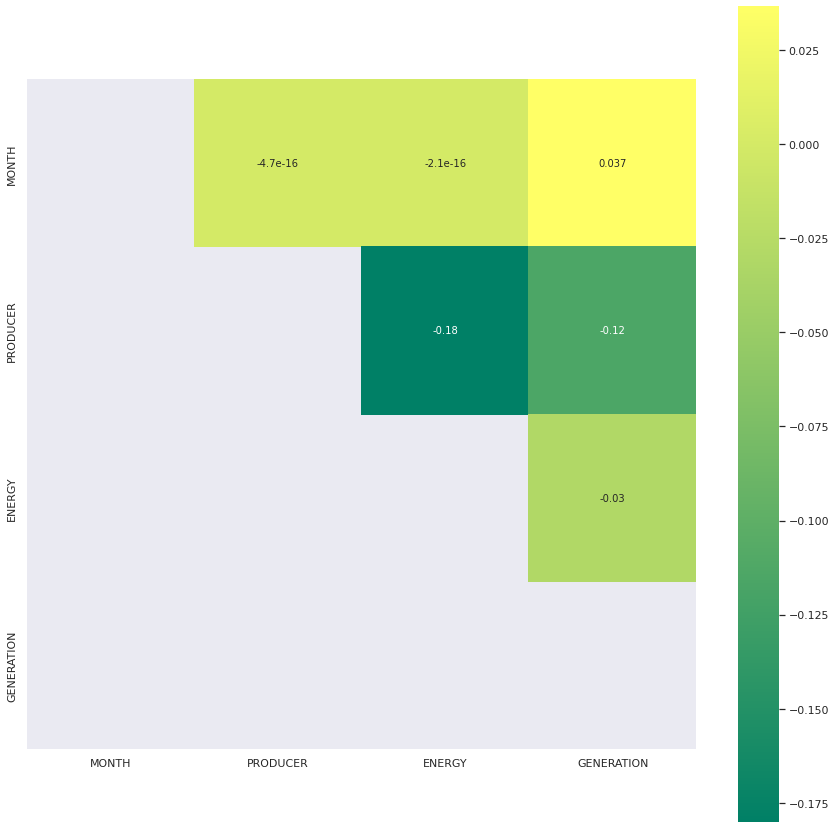

In [115]:
plt.subplots(figsize=(15,15))
matrix = np.tril(mydata.corr())
sns.heatmap(mydata.corr(), annot = True, cmap= 'summer',square=True,mask = matrix)

The Positives number (near to 1)indicates that both variables are proportional, this mean is one value increase the other value increase too. example Montth Vr. Generation 
The Negative number (near to -1.0) indicates a strong negative correlation, i.e., the value of one variable decreases with the other’s increasing and vice-versa. ENERGY Vs.Month, ENERGY Vs. producer, ENERGY Vs. GENERATION.


Function definitions
Function for checking for outliers in the numeric value columns

In [116]:
def outlier(var):
    high = np.mean(var) + 2*np.std(var)
    low = np.mean(var) - 2*np.std(var)
    outliers = (var >= high) | (var <= low)
    return outliers


Function to bin numerical columns

In [117]:
def bins(X, n): 
    BinWidth = (max(X) - min(X))/n
    bound1 = float('-inf')
    bound2 = min(X) + 1 * BinWidth
    bound3 = min(X) + 2 * BinWidth
    bound4 = float('inf')
    Binned = np.array([" "]*len(X)) 
    Binned[(bound1 < X) & (X <= bound2)] = 1 # Low
    Binned[(bound2 < X) & (X <= bound3)] = 2 # Med
    Binned[(bound3 < X) & (X  < bound4)] = 3 # High
    return Binned

Function for z-standardization of a numerical column

In [118]:
# Scaler
scalar = MinMaxScaler()

Remove/replace outliers for the numerical columns.
Replace outliers with median values for the numerical column, 'GENERATION'.

In [119]:
outliers = outlier(mydata['GENERATION'])
mydata.loc[outliers, 'GENERATION'] = np.median(mydata.loc[:,"GENERATION"])

print(mydata)

       MONTH  PRODUCER  ENERGY  GENERATION
162        1         2       3       20157
163        1         2       1      794062
164        1         2       9      114543
165        1         2       7       46489
166        1         2       2         405
...      ...       ...     ...         ...
10791      6         1       7       -3571
10792      6         1       2        2779
10793      6         1      11       51604
10794      6         1       4         425
10795      6         1       8       94338

[264 rows x 4 columns]


# Data Visualization and Analysis

Text(0, 0.5, 'count')

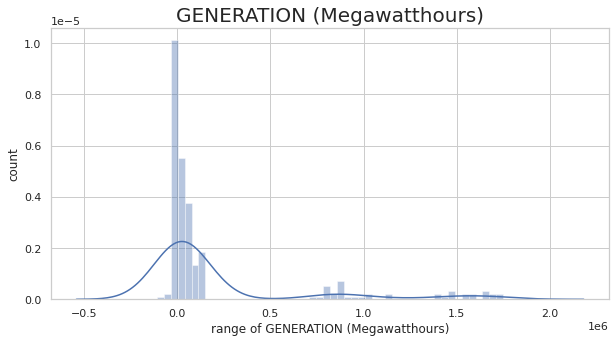

In [120]:
plt.figure(figsize=(10, 5))
sns.set(style = 'whitegrid')
sns.distplot(mydata['GENERATION'])
plt.title('GENERATION (Megawatthours)', fontsize = 20)
plt.xlabel('range of GENERATION (Megawatthours)')
plt.ylabel('count')

In [121]:
#from google.colab import drive
#drive.mount('/content/drive')

Text(6.5, 0, "1 - Electric Generators, Electric Utilities \n2 - Combined Heat'and' Power, Industrial Power \n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power")

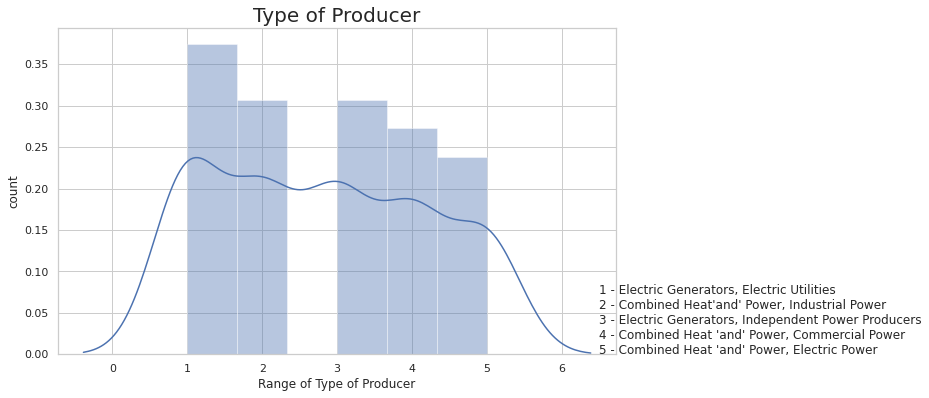

In [122]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(mydata['PRODUCER'])
plt.title('Type of Producer', fontsize = 20)
plt.xlabel('Range of Type of Producer')
plt.ylabel('count')
plt.text(6.5,0, "1 - Electric Generators, Electric Utilities \n2 - Combined Heat'and' Power, Industrial Power \n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power")


Text(16, 0, '1 = Natural Gas \n2 = Petroleum \n3 = Coal \n4 = Other Biomass \n5 = Hydroelectric Conventional \n6 = Wood and Wood Derived Fuels \n7 = Other\n8 = Wind \n9 = Other Gasses \n10 = Nuclear \n11 = Solar Thermal and Photovoltaic \n12 = Pumped Storage  \n13 = Geothermal')

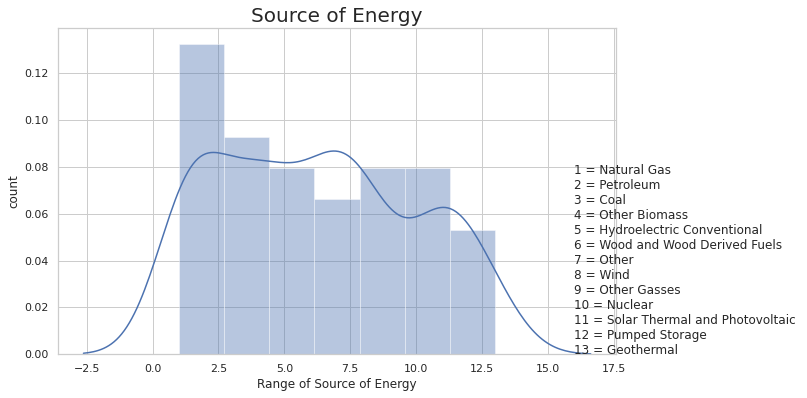

In [123]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(mydata['ENERGY'])
plt.title('Source of Energy', fontsize = 20)
plt.xlabel('Range of Source of Energy')
plt.ylabel('count')
plt.text(16,0, "1 = Natural Gas \n2 = Petroleum \n3 = Coal \n4 = Other Biomass \n5 = Hydroelectric Conventional \n6 = Wood and Wood Derived Fuels \n7 = Other\n8 = Wind \n9 = Other Gasses \n10 = Nuclear \n11 = Solar Thermal and Photovoltaic \n12 = Pumped Storage  \n13 = Geothermal")


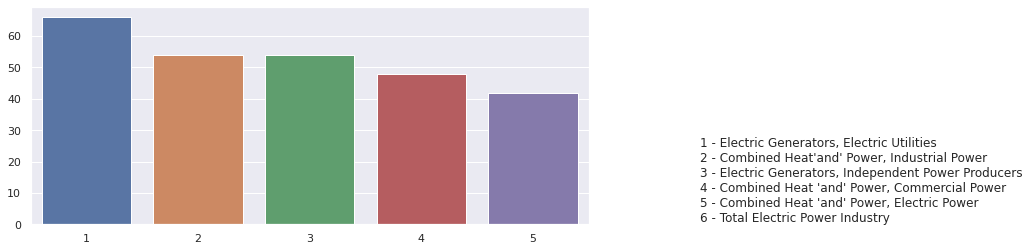

In [124]:
PRODUCER = mydata.PRODUCER.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=PRODUCER.index, y=PRODUCER.values)
plt.text(5.5,1, "1 - Electric Generators, Electric Utilities\n2 - Combined Heat'and' Power, Industrial Power\n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power\n6 - Total Electric Power Industry")
plt.show()

##Observing Correlation between features of the Dataset

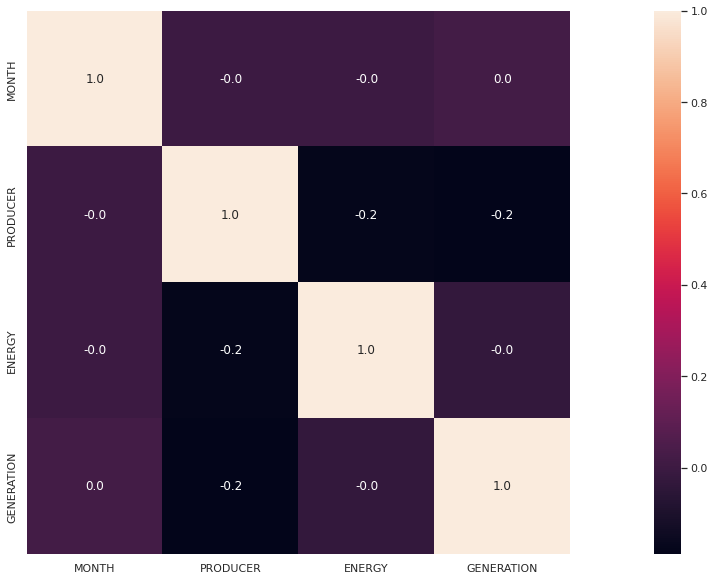

In [125]:
correlation = mydata.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )  

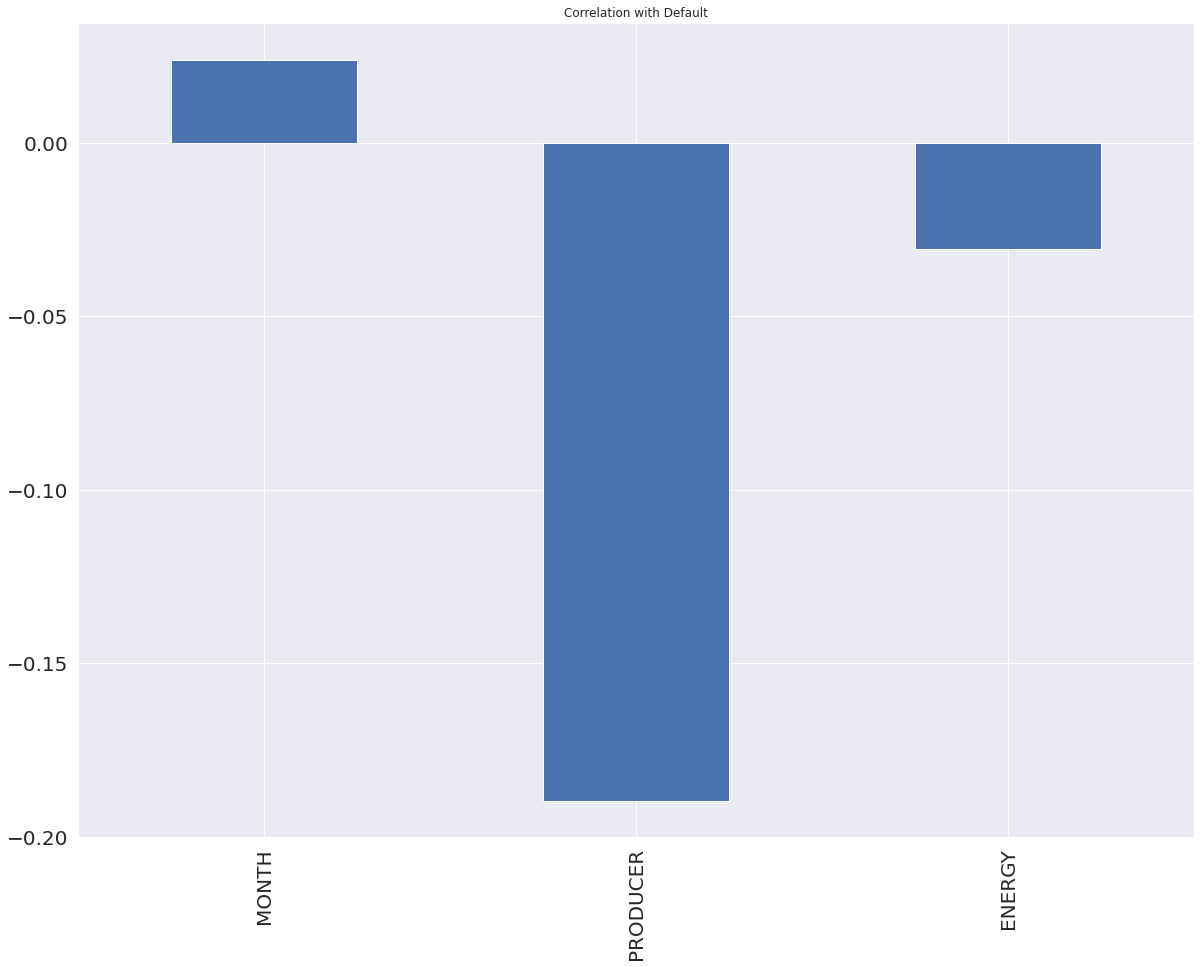

In [126]:
X = mydata.drop(['GENERATION'],axis=1)
X.corrwith(mydata['GENERATION']).plot.bar(figsize = (20, 15), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

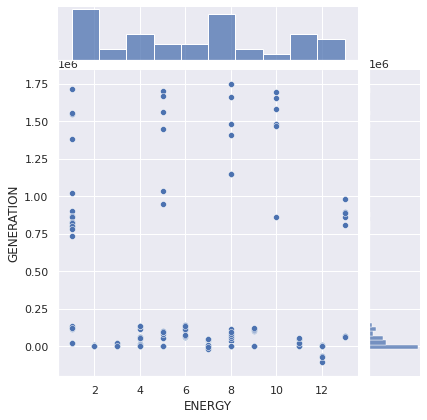

In [127]:
sns.jointplot(x='ENERGY',y='GENERATION',data=mydata,kind="scatter")

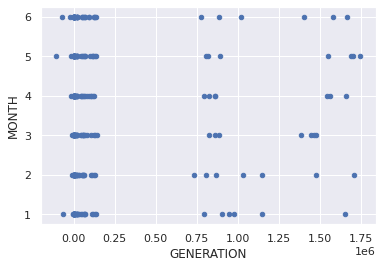

In [128]:
mydata.plot(x = 'GENERATION', y = 'MONTH', kind='scatter')

In [129]:
mydata.corr()

,MONTH,PRODUCER,ENERGY,GENERATION
MONTH,1.000000e+00,-4.716858e-16,-2.107552e-16,0.023913
PRODUCER,-4.716858e-16,1.000000e+00,-1.800331e-01,-0.189699
ENERGY,-2.107552e-16,-1.800331e-01,1.000000e+00,-0.030490
GENERATION,2.391256e-02,-1.896988e-01,-3.048971e-02,1.000000


In [130]:
print(mydata)

       MONTH  PRODUCER  ENERGY  GENERATION
162        1         2       3       20157
163        1         2       1      794062
164        1         2       9      114543
165        1         2       7       46489
166        1         2       2         405
...      ...       ...     ...         ...
10791      6         1       7       -3571
10792      6         1       2        2779
10793      6         1      11       51604
10794      6         1       4         425
10795      6         1       8       94338

[264 rows x 4 columns]


Normalize values for the numerical columns by z-standardization

Normalize the GENERATION column; plot the normalized GENERATION data.

In [131]:
normalized_mydata=(mydata-mydata.mean())/mydata.std()

In [132]:
mydata.head(5)

,MONTH,PRODUCER,ENERGY,GENERATION
162,1,2,3,20157
163,1,2,1,794062
164,1,2,9,114543
165,1,2,7,46489
166,1,2,2,405


Text(0.5, 1.0, 'Month')

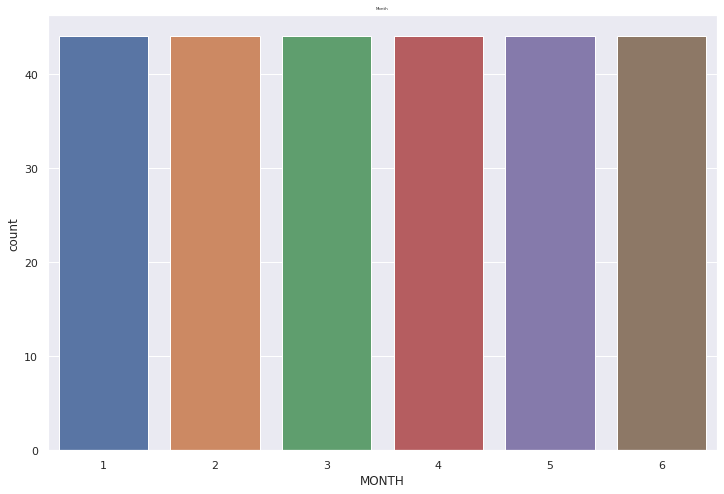

In [133]:
plt.figure(figsize=(12, 8))
sns.countplot(mydata.MONTH.dropna(), order = mydata.MONTH.value_counts().index);
plt.title('Month', fontsize = 4)

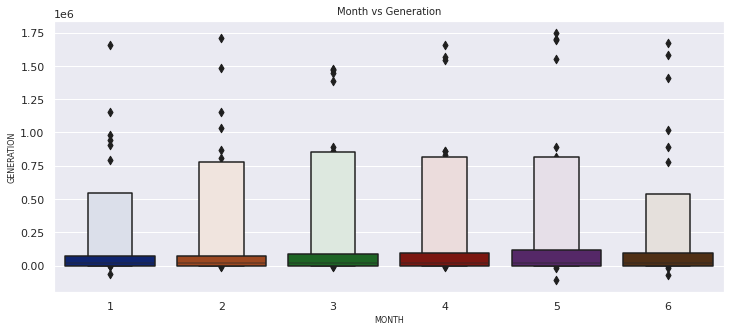

In [134]:
plt.rcParams['figure.figsize'] = (12, 5)
# exit Generation vrs Month
sns.boxenplot(mydata['MONTH'], mydata['GENERATION'], palette = 'dark')
plt.title('Month vs Generation', fontsize = 10)
plt.xlabel('MONTH', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)

plt.show()

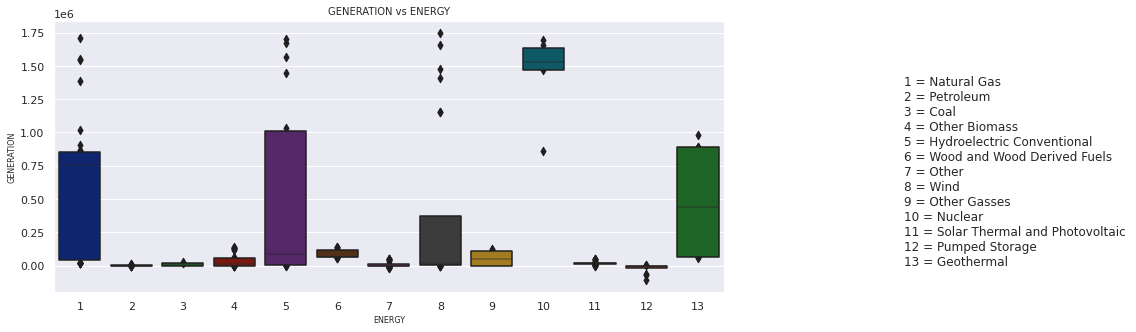

In [135]:
plt.rcParams['figure.figsize'] = (12, 5)
# exit Generation vrs Energy
sns.boxenplot(mydata['ENERGY'], mydata['GENERATION'], palette = 'dark')
plt.title('GENERATION vs ENERGY', fontsize = 10)
plt.xlabel('ENERGY', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)
plt.text(16,0, "1 = Natural Gas \n2 = Petroleum \n3 = Coal \n4 = Other Biomass \n5 = Hydroelectric Conventional \n6 = Wood and Wood Derived Fuels \n7 = Other\n8 = Wind \n9 = Other Gasses \n10 = Nuclear \n11 = Solar Thermal and Photovoltaic \n12 = Pumped Storage  \n13 = Geothermal")

plt.show()

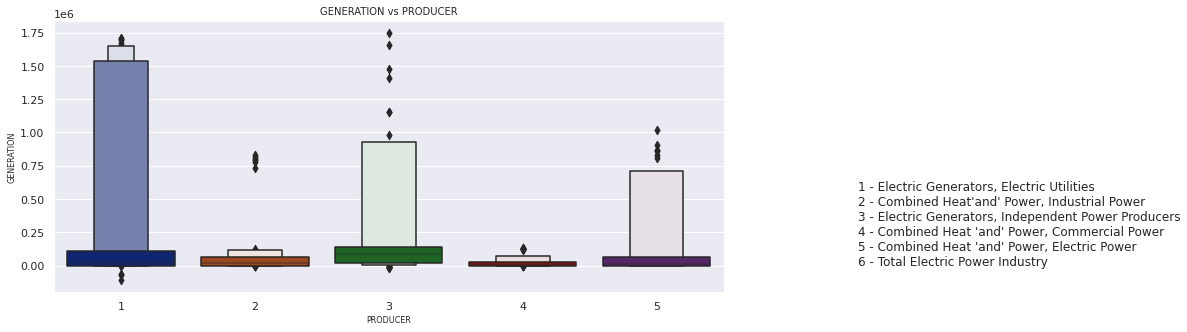

In [136]:
plt.rcParams['figure.figsize'] = (12, 5)
# exit Generation vrs Producer
sns.boxenplot(mydata['PRODUCER'], mydata['GENERATION'], palette = 'dark')
plt.title('GENERATION vs PRODUCER', fontsize = 10)
plt.xlabel('PRODUCER', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)
plt.text(5.5,1, "1 - Electric Generators, Electric Utilities\n2 - Combined Heat'and' Power, Industrial Power\n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power\n6 - Total Electric Power Industry")
plt.show()

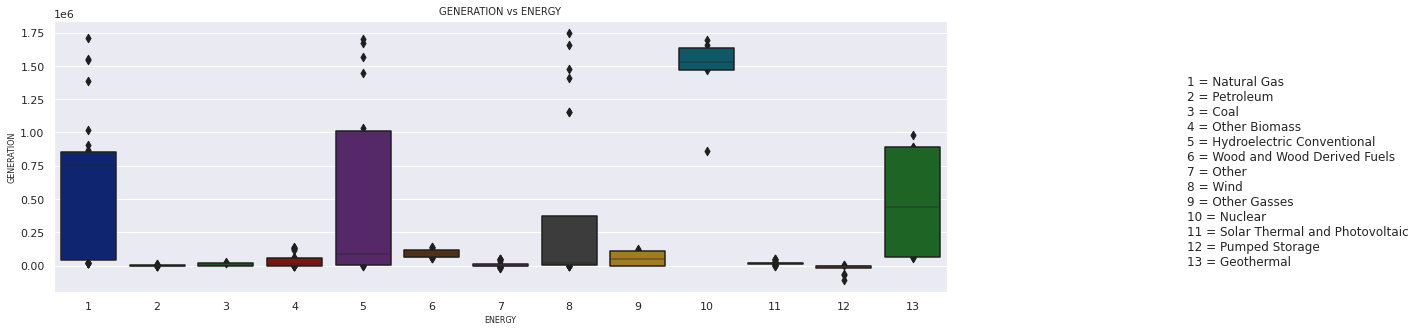

In [137]:
plt.rcParams['figure.figsize'] = (16, 5)
# exit Generation vrs Energy
sns.boxenplot(mydata['ENERGY'], mydata['GENERATION'], palette = 'dark')
plt.title('GENERATION vs ENERGY', fontsize = 10)
plt.xlabel('ENERGY', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)
plt.text(16,0, "1 = Natural Gas \n2 = Petroleum \n3 = Coal \n4 = Other Biomass \n5 = Hydroelectric Conventional \n6 = Wood and Wood Derived Fuels \n7 = Other\n8 = Wind \n9 = Other Gasses \n10 = Nuclear \n11 = Solar Thermal and Photovoltaic \n12 = Pumped Storage  \n13 = Geothermal")
plt.show()

The violin plot is showing us the same pattern for each visitor type. Page Value for most of the entries are close to 0 when the Revenue is False. But the values are spread out when Revenue is True. This may come from the definition of the PageValue, which gives a value close to 0 to pages which did not generate a lot of revenue.

Transform "GENERATION" float to integer

In [138]:
mydata['GENERATION'] = mydata['GENERATION'].astype(int) 

In [139]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 162 to 10795
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MONTH       264 non-null    int64
 1   PRODUCER    264 non-null    int64
 2   ENERGY      264 non-null    int64
 3   GENERATION  264 non-null    int64
dtypes: int64(4)
memory usage: 18.4 KB
None


##Spiliting Dataset into training(75%) and test set(25%)

In [140]:
X = mydata.iloc[:,:-1].values
y = mydata.iloc[:,-1].values
y = y.astype('int')

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

X_train.shape

(198, 3)

Look up the target y


In [141]:
y

array([  20157,  794062,  114543,   46489,     405,    9112,       0,
           155,   62609,       0,     138,  128644,     -13,      36,
         11831,   62388,     679,       0,  903532,    8441,       0,
           436,   14420,   69833,  978538,   52290,   19606,   -3610,
          1162,   19606,  135905, 1150986,  119644,   69905,  -64301,
        947160,   19606, 1656360,       0,   -1156,    2665,   27918,
           900,   34854,   19648,  734480,  104592,   31829,     266,
         10372,       0,     232,   58181,       0,     778,  113998,
           -20,      28,   13459,   52702,     842,       0,  870520,
          8397,       0,     492,   13483,   63718,  807771,   55700,
         19606,   -9832,    8469,   19606,  124656, 1151409,  131811,
         63234,    6527, 1032271, 1712991, 1481389,       0,    -938,
          2399,   31993,     385,   51533,   23387,  827721,  108597,
         44102,    1390,   13323,       0,     388,   58255,       0,
           930,  126

###Split data records

In [142]:
X_train

array([[ 5,  2,  1],
       [ 3,  1, 12],
       [ 2,  5,  6],
       [ 6,  1, 11],
       [ 1,  3,  2],
       [ 1,  4,  8],
       [ 4,  1,  7],
       [ 4,  5,  1],
       [ 2,  2,  7],
       [ 5,  3,  6],
       [ 1,  1,  2],
       [ 3,  5,  7],
       [ 6,  3,  1],
       [ 2,  3,  5],
       [ 5,  4,  7],
       [ 3,  3,  4],
       [ 3,  3,  8],
       [ 5,  4,  5],
       [ 6,  1,  2],
       [ 3,  3,  1],
       [ 2,  4,  4],
       [ 3,  1,  7],
       [ 4,  5,  2],
       [ 4,  3,  1],
       [ 4,  5,  4],
       [ 3,  3, 11],
       [ 3,  5,  1],
       [ 1,  4, 11],
       [ 4,  1, 10],
       [ 6,  3, 11],
       [ 1,  5, 11],
       [ 3,  2,  1],
       [ 2,  4,  7],
       [ 6,  2,  8],
       [ 2,  4,  1],
       [ 6,  4,  5],
       [ 5,  4, 12],
       [ 2,  1,  2],
       [ 2,  4, 12],
       [ 6,  1,  1],
       [ 4,  2,  6],
       [ 6,  3,  7],
       [ 5,  4,  1],
       [ 3,  3,  2],
       [ 4,  4,  8],
       [ 1,  1,  4],
       [ 1,  5,  3],
       [ 1,  

In [143]:
X_test

array([[ 3,  2,  8],
       [ 1,  4,  7],
       [ 4,  3,  6],
       [ 5,  2,  3],
       [ 2,  2,  8],
       [ 6,  1,  9],
       [ 6,  2,  2],
       [ 4,  1,  5],
       [ 2,  1, 12],
       [ 3,  1,  5],
       [ 4,  1,  4],
       [ 2,  3, 11],
       [ 5,  4,  8],
       [ 2,  2,  3],
       [ 4,  2,  4],
       [ 1,  1,  9],
       [ 3,  3, 13],
       [ 1,  2,  2],
       [ 6,  5,  2],
       [ 6,  3,  8],
       [ 6,  5,  7],
       [ 1,  1, 12],
       [ 3,  2,  3],
       [ 5,  2,  2],
       [ 6,  1, 10],
       [ 3,  5,  2],
       [ 2,  5,  1],
       [ 5,  4, 11],
       [ 3,  2,  9],
       [ 2,  4, 11],
       [ 6,  1,  8],
       [ 3,  2, 11],
       [ 1,  3,  7],
       [ 3,  1,  4],
       [ 1,  1,  7],
       [ 5,  3, 11],
       [ 3,  2,  7],
       [ 5,  2,  4],
       [ 4,  3,  8],
       [ 2,  1, 11],
       [ 4,  1,  1],
       [ 4,  1,  9],
       [ 6,  5,  1],
       [ 4,  2,  3],
       [ 3,  4,  1],
       [ 2,  1,  5],
       [ 6,  2,  3],
       [ 3,  

In [144]:
y_train

array([ 819316,   -1344,   63718,   51604,    1162,     679,   -2863,
        828722,   31829,  116671,    2665,    8295,   19606,   55700,
           -31,  133032, 1479621,    1647,    2779,   19606,   52702,
         -1036,       0,   19606,   13286,   19606,  862711,   11831,
        864541,   19606,     436,  827721,     -20,     598,  113998,
           533,       0,    2399,       0,   19606,   59968,  -19743,
        134406,    8658,     718,     900,       0,    9112,    8001,
           592,     266,  -13278,   94017,   13483,   19606,     -32,
       1701285,       0,     416,     778,  887419,     930,      34,
             0,     772,       0,   72054,       0,     471,   57994,
       1481389, 1384054,    2563,   47777,      36,     425,   46866,
        734480,      29,   59075,   19606, 1692998,    4245,   -3571,
         18140, 1151409,   19606,       0,  779901,   19606,  114543,
             0,       0,   48798,  132728,   63234,   82927,     492,
          7605,    7

In [145]:
y_test

array([    388,     -13,  107583,   15525,     232,       0,     210,
       1563547,    6527, 1449260,     392,   19606,     678,   19648,
             0,       0,  888526,     405,       0, 1407979,    4842,
        -64301,   23387,     252, 1581209,       0,  870520,   22084,
        108597,   13459,   94338,   13323,   -3610,     414,   -1156,
         19606,   44102,       0, 1660738,   31993, 1545147,       0,
       1020510,    9549,  126747, 1032271,   19564,   17483,   50220,
           801, 1150986,  903532,  141912,  114607, -107933,    8441,
         14124,   10773,   69905,  804842,   68041,  947160,  128644,
         67033,   19606,   20157])

#Principal Component Analysis
We can use principal component analysis to see if we can have a good representation of our dataset in two or three dimensions.

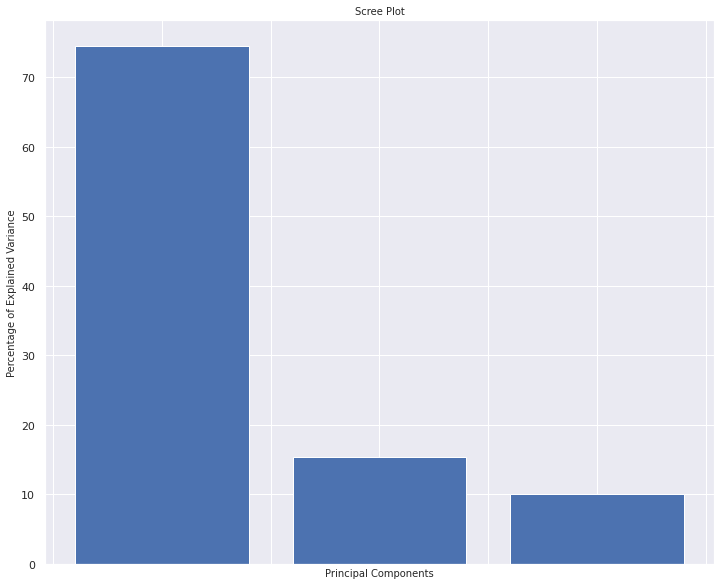

In [146]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = [str(X) for x in range(1,len(per_var)+1)]
plt.rcParams['figure.figsize'] = (12, 10)
font=10
plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Percentage of Explained Variance', fontsize = font)
plt.xlabel('Principal Components', fontsize = font)
plt.title('Scree Plot', fontsize = font)
plt.show()

Because the percentage of explained variance decay slowly, it is not possible to represent well our dataset in two or three dimensions.
2D PCA Plot
We can have a look at our dataset in a 2D Plot.

In [147]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 162 to 10795
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MONTH       264 non-null    int64
 1   PRODUCER    264 non-null    int64
 2   ENERGY      264 non-null    int64
 3   GENERATION  264 non-null    int64
dtypes: int64(4)
memory usage: 18.4 KB
None


##Building ML Model
#Overview of a few model's performance

Let's compare a few algorithms that can be used for classification to see the performance of each ones.

Applying Machine Learning Algorithm for Classification Problem
Logistic Regression
In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>
<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>
<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>
<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>
<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>
<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>
<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>
<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>


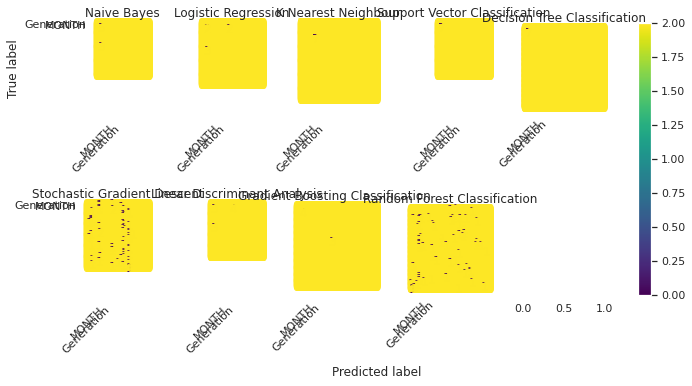

In [148]:
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbour": KNeighborsClassifier(),
    "Support Vector Classification": SVC(),
    "Decision Tree Classification": DecisionTreeClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Gradient Boosting Classification ": GradientBoostingClassifier(),
    "Random Forest Classification": RandomForestClassifier()
    }

f, axes = plt.subplots(2, 5, figsize=(12, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    j = 0
    k = i
    if i>4:
        k = i-5
        j+=1
    
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(ConfusionMatrixDisplay)
    #print(key, "\n Accuracy:",accuracy_score(y_test,y_pred),"\n F-score",f1_score(y_test,y_pred))
    #print("GENERATION : ",mydata.GENERATION(y_test, y_pred, 
    #                                       pos_label='positive'))
    #print("MONTH : ",mydata.MONTH(y_test, y_pred, 
    #                                       pos_label='positive'))
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=["Generation","MONTH"])
    disp.plot(ax=axes[j][k], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.43, -0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=1)


f.colorbar(disp.im_, ax=axes)
plt.show()

##Bivariate analysis

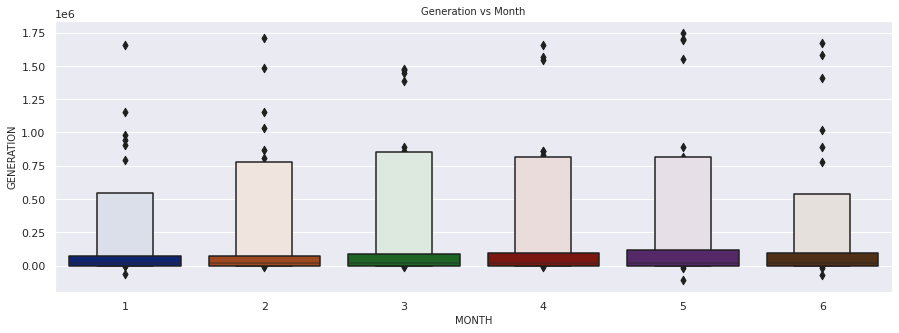

In [149]:
plt.rcParams['figure.figsize'] = (15, 5)
# exit rate vs raevenue
sns.boxenplot(mydata['MONTH'], mydata['GENERATION'], palette = 'dark')
plt.title('Generation vs Month', fontsize = 10)
plt.xlabel('MONTH', fontsize = 10)
plt.ylabel('GENERATION', fontsize = 10)

plt.show()

##K-Nearest Neighbour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

Text(0, 0.5, 'Error Rate')

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

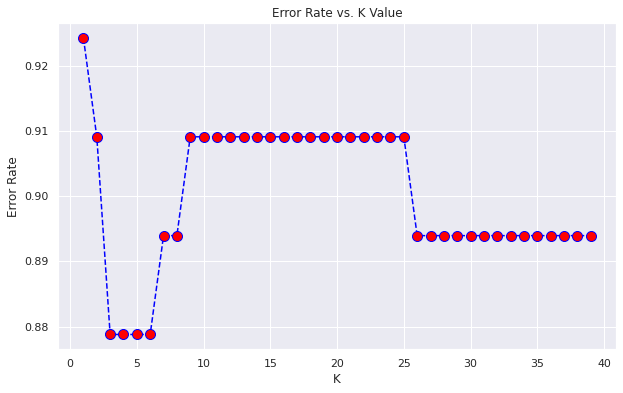

In [150]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

    plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)



from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

ValueError: ignored

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

In [152]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

In [153]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

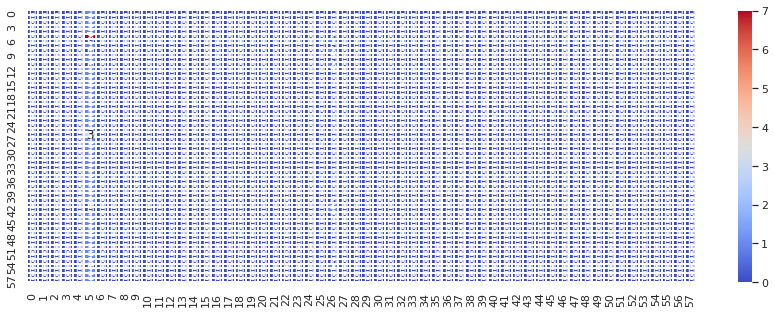

In [154]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')